1. KMeans

In [1]:
from konlpy.tag import Hannanum
import pandas as pd
han = Hannanum()
df = pd.read_csv("../data/text/군집분석데이터.csv", encoding="ms949")
df

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...
5,라돈,"최근 침대 매트리스에 이어 온수매트에서도 라돈이 검출됐다는 소식이 알려지면서, 가정..."
6,라돈,"침대, 생리대, 마스크 등에서 라돈이 검출되면서, 발암 물질 ‘라돈’에 대한 관심..."
7,라돈,하이젠 온수매트가 '라돈 온수매트'로 언급되고 있다.\n\n최근 한 온라인커뮤니티에...
8,라돈,겨울 난방 제품인 온수매트에서 라돈이 검출된 가운데 해당 업체가 별 문제가 되지 않...
9,라돈,"매트리스, 생리대에 이어 온수 매트에서도 라돈이 검출돼 이슈로 떠올랐다.\n\n5일..."


In [2]:
docs = []
for i in df['기사내용']:
    # 명사만 추출
    docs.append(han.nouns(i))

for i in range(len(docs)):
    # 명사들 사이에 공백을 붙여서 열거
    docs[i] = ' '.join(docs[i])

print(docs[0])

유한양행 얀센 바이오테크(Janssen 표적 항암 치료제 기술이전 계약 체결 5일 공시 기술수출금액 12억5500만달러(한화 약 1조3416억원 계약금 5000만달러 개발 허가 매출 단계별 마일스톤 12억500만달러 수령 예정 경상기술료 순매출액 책정 유한양행 관계자 기술이전 계약 수익 식 임상시험 허가 등 성공여부 수 미실현 가능성


In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# BOW(Bag Of Words)를 이용한 문서-단어 행렬 생성
# 문서집합에서 단어 토큰을 생성하고 각 단어의 수를 세어서 인코딩한 벡터를 생성(행은 문서번호, 컬럼은 각 단어)

# vec = CountVectorizer()
vec = TfidfVectorizer()
X = vec.fit_transform(docs)
df2 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
df2.head()

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0.0,0.0,0.0,0.000000,0.182407,0.000000,0.141350,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.072612,0.000000,0.000000,0.072612,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.080221,0.000000,0.103522,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.155423,0.000000,0.000000,0.000000,0.200569,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.068982,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089019,0.0


In [4]:
from sklearn.cluster import KMeans
# 군집 개수를 3으로 설정
kmeans = KMeans(n_clusters=3, random_state=10).fit(df2)
print(kmeans.labels_)

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]


          component1  component2
검색어                             
유한양행        0.465439   -0.274275
유한양행        0.564050   -0.349902
유한양행        0.448806   -0.279217
유한양행        0.454605   -0.266479
유한양행        0.482336   -0.285219
라돈          0.043862    0.372967
라돈          0.026781    0.413062
라돈          0.023662    0.587816
라돈          0.026048    0.689454
라돈          0.026371    0.619923
복면가왕 왕밤빵   -0.530838   -0.256730
복면가왕 왕밤빵   -0.481860   -0.224609
복면가왕 왕밤빵   -0.528182   -0.266369
복면가왕 왕밤빵   -0.557461   -0.271480
복면가왕 왕밤빵   -0.463617   -0.208944


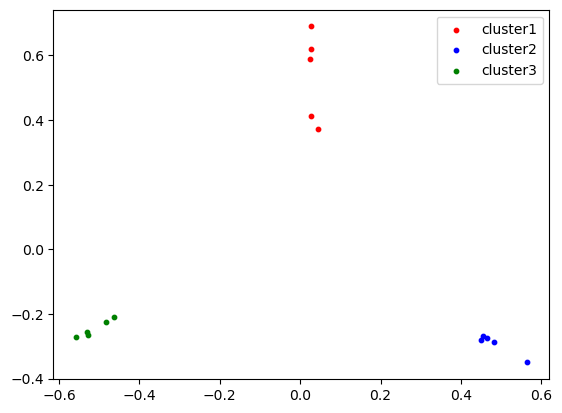

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# 플로팅을 위하여 ca 기법(주성분분석)으로 차원을 2차원으로 축소
pca = PCA(n_components=2, random_state=10)
components = pca.fit_transform(df2)
df3 = pd.DataFrame(data = components, columns=['component1', 'component2'])
df3.index = df['검색어']
print(df3)
kmeans.labels_ == 0

# x축 : first, y축 : second 번호로 나타낸 후 시각화
plt.scatter(df3.iloc[kmeans.labels_ == 0, 0],
            df3.iloc[kmeans.labels_ == 0, 1],
            s = 10, c = 'red', label = 'cluster1')
plt.scatter(df3.iloc[kmeans.labels_ == 1, 0],
            df3.iloc[kmeans.labels_ == 1, 1],
            s = 10, c = 'blue', label = 'cluster2')
plt.scatter(df3.iloc[kmeans.labels_ == 2, 0],
            df3.iloc[kmeans.labels_ == 2, 1],
            s = 10, c = 'green', label = 'cluster3')
plt.legend()
plt.show()

2. KMeans - 뉴스분석

In [8]:
# 한글 뉴스 데이터 분석
# 출처 : https://teddylee777.github.io/machine-learning/sklearn-kmeans-%ED%99%9C%EC%9A%A9%ED%95%9C-%EB%89%B4%EC%8A%A4%EA%B8%B0%EC%82%AC-%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81
import pandas as pd
df = pd.read_csv('../data/text/news.csv')
df.head()

,category,content,date,hate,id,image,keyword,like,rate,skip,sub_category,title,update_date,url,view_count
0,1,“2028학년도에 수시·정시를 통합하겠다는 방안은 수능을 무력화해 대입제도를 학생부...,2019-02-15 02:42:56.000000,0,4,https://pds.joins.com/news/component/htmlphoto...,"대입,교수,수능,시기,학년도",0,0,0,0,“수시·정시 통합해야” vs “수능 무력화 의도”…2028 대입 두고 논란,2019-02-16 17:50:04.872868,https://news.joins.com/article/23373597,0
1,1,최근 열린 삼보국가대표 선발전에서 1위를 한 뒤. 신재용 씨 제공\n\n고교 국가대...,2019-02-16 05:00:00.000000,1,5,http://dimg.donga.com/a/600/0/90/5/wps/NEWS/IM...,"공부,운동,유도,때,대회",0,-2,0,0,“공부하겠다는 내게 감독님이 열쇠 주셔” 서울대 가서도 유도-삼보로 꿈 키워 [양종...,2019-02-16 17:50:05.303722,http://news.donga.com/3/all/20190216/94152869/1,1
2,1,/첨부용/연세대 수험생 대나무숲\n\n우체국 전산 오류로 등록금을 못 내 연세대 합...,2019-02-13 15:00:00.000000,0,6,http://image.chosun.com/sitedata/image/201902/...,"수험,우체국,등록금,글,해당",0,0,0,0,"""등록금 전산 오류로 연대 합격 취소"" 책임 갑론을박",2019-02-16 17:50:05.412111,http://news.chosun.com/site/data/html_dir/2019...,0
3,1,"교육당국, 갑자기 통과 기준 점수 대폭 올려… 폐지 논란 재점화\n\n자사고聯, 교...",2019-02-15 15:00:00.000000,0,7,http://image.chosun.com/sitedata/image/201902/...,"자사고,평가,기준,지표,교육부",2,4,0,0,"""또 자사고 죽이기냐"" 再지정 문턱 높이자 폭발한 학교들",2019-02-16 17:50:05.495572,http://news.chosun.com/site/data/html_dir/2019...,2
4,1,[베리타스알파=권수진 기자] 14일 오후9시 마감한 상위9개대학(고려대 동국대 서강...,2019-02-15 07:37:32.000000,0,8,http://cds.veritas-a.com/news/photo/201902/144...,"충원,모집,추합,과,교육",0,0,0,0,[2019정시충원율] 상위9개대학 57.9%.. ‘상승’.. 추합 4159명,2019-02-16 17:50:06.153964,http://www.veritas-a.com/news/articleView.html...,0


In [9]:
# 클래스별 샘플 갯수
df['category'].value_counts()

2    4682
1    2872
3    2121
Name: category, dtype: int64

In [10]:
import re
# ^[  ] start, [^ ] not, 한글/영문자만 허용
def preprocessing(sentence):
    sentence = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', sentence)
    return sentence

# content 필드에 preprocessing 함수 적용
df['content_cleaned'] = df['content'].apply(preprocessing)
content = df['content_cleaned'].tolist()
content[0]

'     학년도에 수시 정시를 통합하겠다는 방안은 수능을 무력화해 대입제도를 학생부종합전형 학종      로 만들겠다는 꼼수다  학종에 대한 불신이 큰 현실을 외면한 채 혼란을 키우고 있는 김경범 서울대 교수를 국가교육회의에서 내보내야 한다  공정사회를위한국민모임 공정사회 은   일 오전   시 정부서울청사에서 기자회견 열고 국가교육회의 위원인 김경범 서울대 서어서문학과 교수의 사퇴를 촉구했다  김 교수가 학종을 옹호하고 있어 공정한 대입제도 개편에 걸림돌이 된다는 주장이다 이처럼     학년도 대입제도를 둘러싼 논란이 확산하고 있다  전날 청주 오송에서 열린 고교학점제 연구학교 교원연수 행사에서 김 교수가 미래 대입 전형을 주제로 발표한 게 불씨가 됐다  김 교수는 국가교육회의  기에서 고등교육전문위원회 위원으로 참여하고 있다 김 교수는 자료집에서  수시와 정시를   월로 통합해 수능 성적과 학생부 면접을 한꺼번에 평가하자 고 제안했다  또 수능 전 과목을 절대평가하고  EBS 연계도 폐지해야 한다고 주장했다      학년도 고교학점제에 따라     학년도 대입을 개편해야 한다면서 이같이 밝힌 것이다 현행 대입은 수시와 정시로 시기가 구분돼 있어 수시는  월  정시는   월 말에 원서를 접수한다  수시 준비하느라 고   학기 때 학교 수업이 제대로 이뤄지지 않는다는 비판은 꾸준히 제기돼 왔다  김 교수의 주장에 따르면 선발 시기를 통합하면 고  교실도 정상화하고 학생 학부모 교사의 부담도 줄일 수 있다는 것이다 이에 대해 대학 관계자와 교사 학부모는 엇갈린 의견을 내놨다  고교 교사는 환영했지만  대학 입학관계자와 학부모는 부정적이었다  서울 일반고의 한 교사는  대입 전형 시기가 나뉘어 있어 교사와 학생 학부모의 부담이 크고  고   학기 수업이 파행된 것은 맞다 며  이번에 나온 방안은 아니더라도 어떤 식으로든 변화가 필요하다 고 말했다 반면 서울 사립대의 한 입학처장은  고교별 수준이 제각각인 상황에서 수능까지 절대평가로 바뀌면 변별력이 크게 약화할 

- CountVectorizer

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
# 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 인코딩한 벡터를 생성
vectorizer = CountVectorizer(max_features=1000) #단어수 제한
X = vectorizer.fit_transform(content)
X.shape

(9675, 1000)

In [12]:
from sklearn.preprocessing import normalize
# l2 정규화
# 아주 큰 값이나 아주 작은 값을 가지는 outlier에 대해 0에 가까운 값으로 만드는 방식
X = normalize(X)
X[0].toarray()

array([[0.        , 0.        , 0.07930516, 0.        , 0.        ,
        0.        , 0.        , 0.07930516, 0.        , 0.        ,
        0.07930516, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07930516, 0.        ,
        0.        , 0.23791548, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [13]:
from sklearn.cluster import KMeans
# k-means 알고리즘 적용
kmeans = KMeans(n_clusters=3, random_state=10).fit(X)

# labels에 merge
# df['labels'] = kmeans.labels_
print(kmeans.labels_)

[0 0 0 ... 1 1 0]


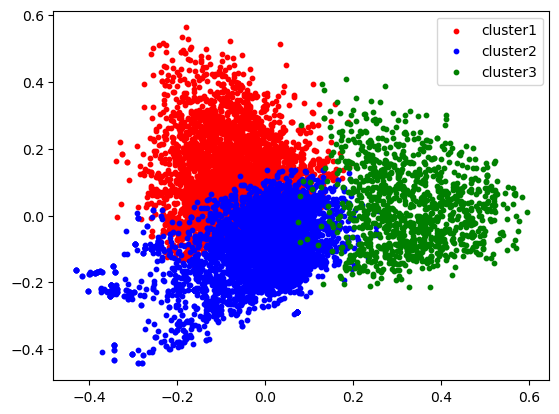

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# 그래프 출력을 위해 주성분 분석
pca = PCA(n_components=2, random_state=10)
components = pca.fit_transform(X.toarray())
df3 = pd.DataFrame(data=components, columns=['component1', 'component2'])
df3.index = df['category']
plt.scatter(df3.iloc[kmeans.labels_ == 0, 0], 
            df3.iloc[kmeans.labels_ == 0, 1],
            s = 10, c = 'r', label = 'cluster1')
plt.scatter(df3.iloc[kmeans.labels_ == 1, 0], 
            df3.iloc[kmeans.labels_ == 1, 1],
            s = 10, c = 'b', label = 'cluster2')
plt.scatter(df3.iloc[kmeans.labels_ == 2, 0], 
            df3.iloc[kmeans.labels_ == 2, 1],
            s = 10, c = 'g', label = 'cluster3')
plt.legend()
plt.show()

- TfidfVectorizer

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
# 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 인코딩한 벡터를 생성
vectorizer = TfidfVectorizer(max_features=1000) #단어수 제한
X = vectorizer.fit_transform(content)
X.shape

(9675, 1000)

In [16]:
from sklearn.preprocessing import normalize
# l2 정규화
# 아주 큰 값이나 아주 작은 값을 가지는 outlier에 대해 0에 가까운 값으로 만드는 방식
X = normalize(X)
X[0].toarray()

array([[0.        , 0.        , 0.04682459, 0.        , 0.        ,
        0.        , 0.        , 0.07992191, 0.        , 0.        ,
        0.04604944, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.0572615 , 0.        ,
        0.        , 0.18174446, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [17]:
from sklearn.cluster import KMeans
# k-means 알고리즘 적용
kmeans = KMeans(n_clusters=3, random_state=10).fit(X)

# labels에 merge
# df['labels'] = kmeans.labels_
print(kmeans.labels_)

[2 1 1 ... 1 1 1]


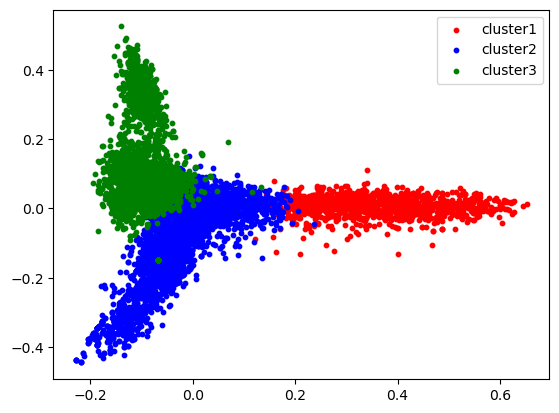

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# 그래프 출력을 위해 주성분 분석
pca = PCA(n_components=2, random_state=10)
components = pca.fit_transform(X.toarray())
df3 = pd.DataFrame(data=components, columns=['component1', 'component2'])
df3.index = df['category']
plt.scatter(df3.iloc[kmeans.labels_ == 0, 0], 
            df3.iloc[kmeans.labels_ == 0, 1],
            s = 10, c = 'r', label = 'cluster1')
plt.scatter(df3.iloc[kmeans.labels_ == 1, 0], 
            df3.iloc[kmeans.labels_ == 1, 1],
            s = 10, c = 'b', label = 'cluster2')
plt.scatter(df3.iloc[kmeans.labels_ == 2, 0], 
            df3.iloc[kmeans.labels_ == 2, 1],
            s = 10, c = 'g', label = 'cluster3')
plt.legend()
plt.show()

3. 계층적 클러스터링
- 트리 형태의 군집으로 나누는 방법
- 개별대상간의 거리에 의하여 가장 가까이에 있는 대상들로부터 시작하여 결합하여 트리 모양의 계층구조를 형성하는 방법

In [1]:
import pandas as pd
df = pd.read_csv("c:/vscode/data/text/군집분석데이터.csv", encoding="ms949")
df.head(2)

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Hannanum
hannanum = Hannanum()
docs = []
for i in df['기사내용']:
    docs.append(hannanum.nouns(i)) # 명사 추출

In [21]:
# 단어에 공백을 추가
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])
print(docs[:2])

['유한양행 얀센 바이오테크(Janssen 표적 항암 치료제 기술이전 계약 체결 5일 공시 기술수출금액 12억5500만달러(한화 약 1조3416억원 계약금 5000만달러 개발 허가 매출 단계별 마일스톤 12억500만달러 수령 예정 경상기술료 순매출액 책정 유한양행 관계자 기술이전 계약 수익 식 임상시험 허가 등 성공여부 수 미실현 가능성', '유한양행 1조4000억원 규모 기술이전 계약 체결 소식 가격제한폭 5일 오전 9시 3분 유한양행 전날 5만3000원(29. 78 23만1000원 거래 사흘 연속 강세 유한양행 글로벌 제약사 존슨앤존슨(J&J) 자회사 얀센 바이오테크(Janssen 저해제 ‘레이저티닙’(프로젝트명 YH25448) 기술수출 계약 체결 이날 계약규모 약 1조4000억원(12억5500만달러) 반환 의무 계약금 560억원(5000 이번 계약 얀센 전세계 레이저티닙 개발 제조 상업화 독점적 권리 국내 개발 상업화 권리 유한양행 유 유한양행 얀센 바이오텍 내년 레이저티닙 단일요법 병용요법 글로벌 임상시험 공동 진행 예정 유한양행 개발 허가 상업화 성공 단계별 마일스톤 기술료 12억500 달러(약 1조3500억원 수 임상시험 허가 상업화 실패 경우 기술이전 계약 종료 경우 유한양행 얀센 측 지급 위약금']


In [22]:
vec = CountVectorizer()
X = vec.fit_transform(docs)
df2 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df2.head(2)

c:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


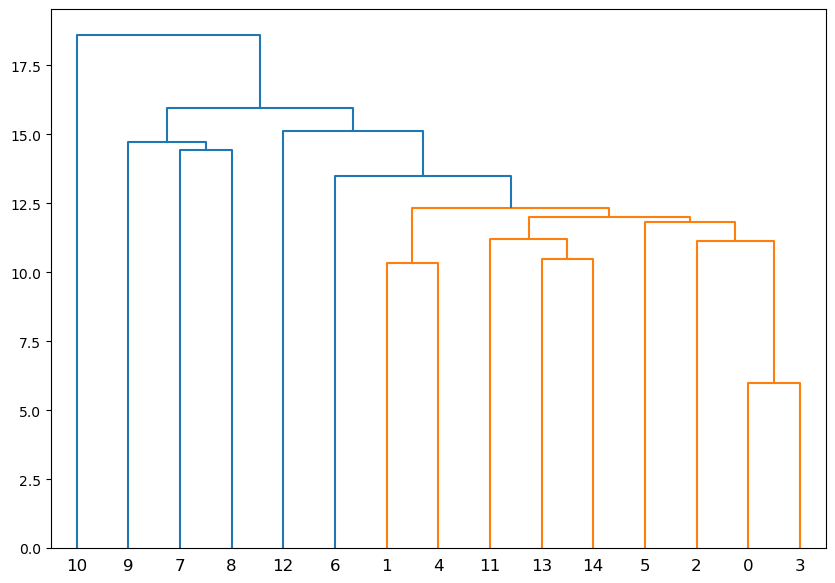

In [23]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
# 계층적 클러스터링 : 하나의 데이터 샘플을 하나의 클러스터로 보고 가장 유사도가 높은 클러스터를 합치면서 클러스터 갯수를 줄여가는 방법
cluster = AgglomerativeClustering(n_clusters=3) # 클러스터수를 3으로 설정
cluster.fit_predict(df2)

# 덴드로그램 출력, 트리를 나타내는 다이어그램
plt.figure(figsize=(10, 7))
result = shc.linkage(df2)
shc.dendrogram(result)
plt.show()

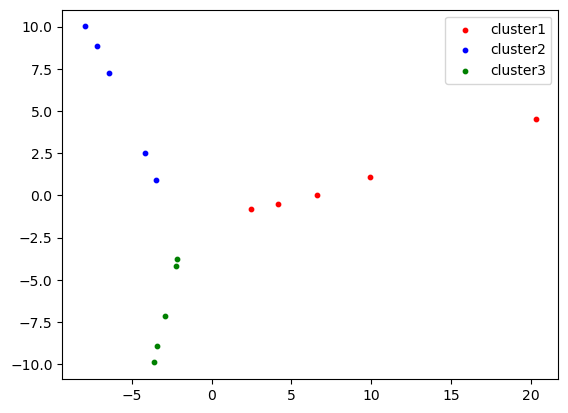

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#그래프 출력을 위해 주성분 분석
pca=PCA(n_components=2, random_state=10)
components=pca.fit_transform(df2)
df3=pd.DataFrame(data=components, columns=['component1','component 2'])
df3.index=df['검색어']
plt.scatter(df3.iloc[cluster.labels_ == 0, 0],
df3.iloc[cluster.labels_ == 0, 1], s=10, c='r', label='cluster1')
plt.scatter(df3.iloc[cluster.labels_ == 1, 0],
df3.iloc[cluster.labels_ == 1, 1], s=10, c='b', label='cluster2')
plt.scatter(df3.iloc[cluster.labels_ == 2, 0],
df3.iloc[cluster.labels_ == 2, 1], s=10, c='g', label='cluster3')
plt.legend()
plt.show()